In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#  palette=["#00a082", "#ffc244"]

In [2]:
df_glovo_ta = pd.read_csv(r'../../data/df_glovo_ta.csv')
df_glovo = pd.read_csv(r'../../data/df_glovo.csv')
df_ta = pd.read_csv(r'../../data/df_ta.csv')

In [3]:
df_glovo

,Unnamed: 0,Name,Cuisine Style,Rating Glovo,Number of Reviews
0,0,KFC,"['American', 'Chicken']",91%,168
1,1,VICIO,['Burgers'],94%,500+
2,2,Healthy Poke,"['Healthy', 'Poke']",95%,500+
3,3,Gonzalez & Co,"['American', 'Latin American']",97%,500+
4,4,McDonald's®,"['American', 'Burgers']",90%,500+
...,...,...,...,...,...
1779,1779,Sushi Style,"['Japanese', 'Sushi']",54%,49
1780,1780,Pasta Sicily,"['Burgers', 'Italian']",44%,19
1781,1781,Green Sushi,"['Asian', 'Japanese']",41%,16
1782,1782,Pulled Burger,"['American', 'Burgers']",28%,16


In [4]:
df_glovo[['Cuisine1', 'Cuisine2']] = df_glovo['Cuisine Style'].str.strip("[]").str.split(", ", expand=True)

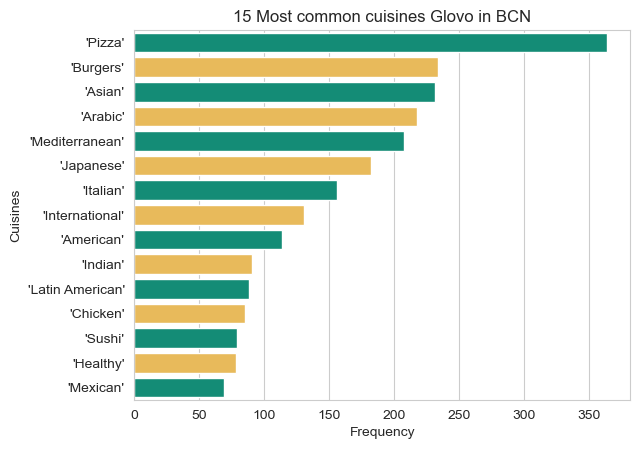

In [5]:

# Create a list of all cuisines by combining the values of 'Cuisine1' and 'Cuisine2'
cuisine_glovo = df_glovo['Cuisine1'].fillna('').tolist() + df_glovo['Cuisine2'].fillna('').tolist()

# Count the frequency of each cuisine
cuisine_counts = pd.Series(cuisine_glovo).value_counts()

# Plot the top 15 most frequent cuisines as a bar chart using Seaborn
sns.set_style("whitegrid")
sns.barplot(x=cuisine_counts.values[1:16], y=cuisine_counts.index[1:16], palette=["#00a082", "#ffc244"])
plt.xlabel('Frequency')
plt.ylabel('Cuisines')
plt.title('15 Most common cuisines Glovo in BCN')
plt.show()


In [6]:
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].replace("--", np.nan)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].replace("New", np.nan)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].str.strip('%').astype(float)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].astype(float)






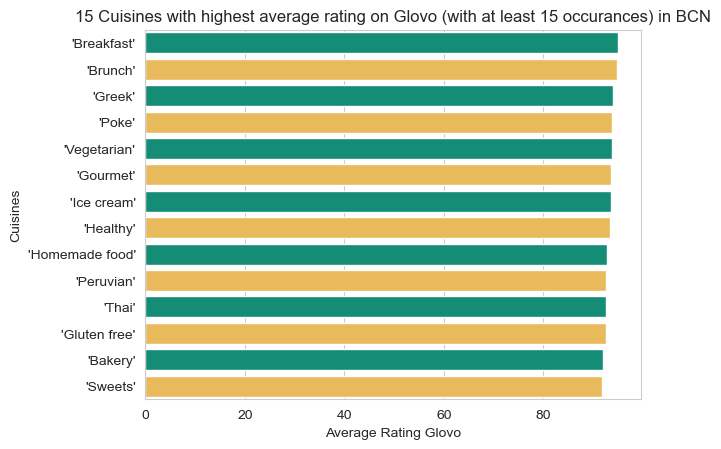

In [7]:
cuisine1_counts = df_glovo['Cuisine1'].value_counts()
cuisine2_counts = df_glovo['Cuisine2'].value_counts()
cuisines_counts = cuisine1_counts + cuisine2_counts
cuisines_counts = cuisines_counts[cuisines_counts >= 15].index

# Group by 'Cuisine1' and calculate mean 'Rating Glovo'
cuisine1_mean = df_glovo.groupby('Cuisine1')['Rating Glovo'].mean()
cuisine2_mean = df_glovo.groupby('Cuisine2')['Rating Glovo'].mean()
cuisines_mean = pd.concat([cuisine1_mean, cuisine2_mean], axis=1).mean(axis=1)
cuisines_mean.sort_values(ascending=False, inplace=True)
top_15_cuisines = cuisines_mean[1:16]

# Plot the chart
sns.set_style("whitegrid")
sns.barplot(y=top_15_cuisines.index[1:16], x=top_15_cuisines.values[1:16], palette=["#00a082", "#ffc244"])
plt.xlabel('Average Rating Glovo')
plt.ylabel('Cuisines')
plt.title('15 Cuisines with highest average rating on Glovo (with at least 15 occurances) in BCN')
plt.xticks
plt.show()



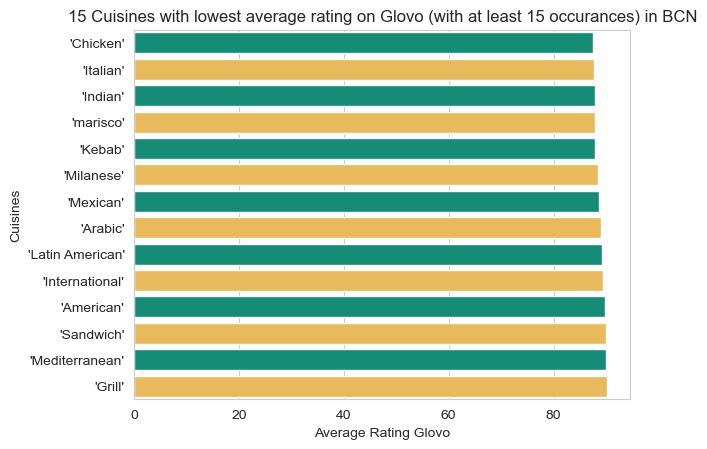

In [8]:
cuisine1_mean = df_glovo.groupby('Cuisine1')['Rating Glovo'].mean()
cuisine2_mean = df_glovo.groupby('Cuisine2')['Rating Glovo'].mean()
cuisines_mean = pd.concat([cuisine1_mean, cuisine2_mean], axis=1).mean(axis=1)
cuisines_mean.sort_values(ascending=True, inplace=True)
bottom_15_cuisines = cuisines_mean[1:16]

sns.set_style("whitegrid")
sns.barplot(y=bottom_15_cuisines.index[1:16], x=bottom_15_cuisines.values[1:16], palette=["#00a082", "#ffc244"])
plt.xlabel('Average Rating Glovo')
plt.ylabel('Cuisines')
plt.title('15 Cuisines with lowest average rating on Glovo (with at least 15 occurances) in BCN')
plt.xticks
plt.show()

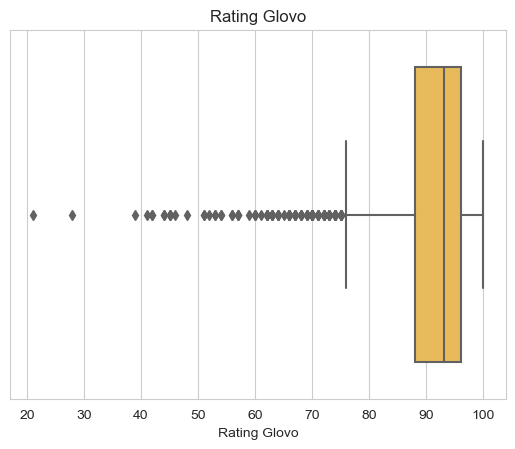

In [9]:
sns.boxplot(x=df_glovo["Rating Glovo"], color='#ffc244')
plt.title("Rating Glovo")
plt.show()

In [15]:
df_glovo
# Dropping all columns we don't need
df_glovo.drop(columns='Unnamed: 0',inplace=True)
df_glovo.drop(columns='Cuisine Style',inplace=True)
df_glovo.drop(columns='Cuisine2',inplace=True)
